In [2]:
#importing the datasets
import pandas as pd
import numpy as np

train=pd.read_csv("/train.csv")
test=pd.read_csv("/test.csv")

print("Training Data")
display(train.head(5))
print("\nTesting Data")
display(test.head(5))

Training Data


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1



Testing Data


,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [3]:
# Shape of Datasets
print("Train Dataset shape:\n",train.shape,"\n")
print("Test Dataset shape:\n",test.shape) 

Train Dataset shape:
 (7613, 5) 

Test Dataset shape:
 (3263, 4)


In [4]:
#checkin for null values
print("Train Dataset missing data:\n",train.isnull().sum(),"\n")
print("Test Dataset missing data:\n",test.isnull().sum())

Train Dataset missing data:
 id             0
keyword       61
location    2533
text           0
target         0
dtype: int64 

Test Dataset missing data:
 id             0
keyword       26
location    1105
text           0
dtype: int64


In [5]:
# Visualization library
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

,target
0,4342
1,3271


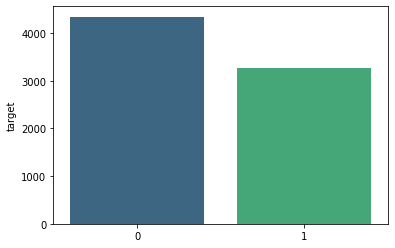

In [6]:
# using pandas value counts on target will give us number of 0's with is non disaster tweets, and 1's which is disaster tweets. 
VCtrain=train['target'].value_counts().to_frame()

# seaborn barplot to display barchart
sns.barplot(data=VCtrain,x=VCtrain.index,y="target",palette="viridis")
VCtrain

In [7]:
# Going deep into disaster Tweets
display("Random sample of disaster tweets:",train[train.target==1].text.sample(5).to_frame())
display("Random sample of non disaster tweets:",train[train.target==0].text.sample(5).to_frame())

'Random sample of disaster tweets:'

,text
7112,Dramatic Video Shows Plane Landing During Viol...
4274,Longest Streak of Triple-Digit Heat Since 2013...
6568,Patient-reported outcomes in long-term survivo...
4311,@gg_keeponrockin @StrawberrySoryu Oh okay I ju...
7298,Map shows where all of California's wild#fires...


'Random sample of non disaster tweets:'

,text
7005,You are listening to LLEGASTE TU - TWISTER EL REY
66,@ablaze what time does your talk go until? I d...
1057,Fairfax investigating firefighter over Faceboo...
3571,Robert Conquest Famine Museum Kiev @GuidoFawke...
5571,Waking up sick with a rainstorm outside would ...


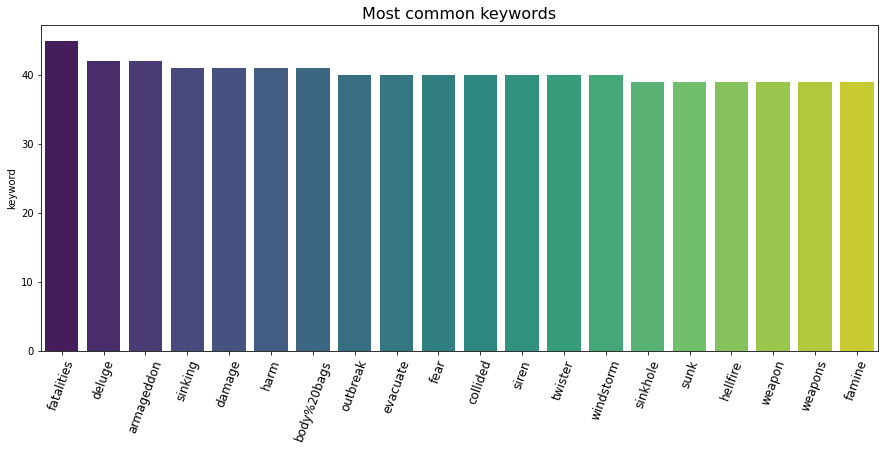

In [8]:
#Most Common Keywords
common_keywords=train["keyword"].value_counts()[:20].to_frame()
fig=plt.figure(figsize=(15,6))
sns.barplot(data=common_keywords,x=common_keywords.index,y="keyword",palette="viridis")
plt.title("Most common keywords",size=16)
plt.xticks(rotation=70,size=12);

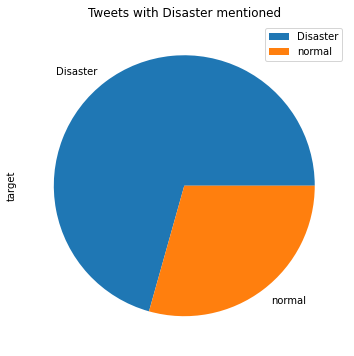

In [9]:
#Tweets with Disaster mentioned
train[train.text.str.contains("disaster")].target.value_counts().to_frame().rename(index={1:"Disaster",0:"normal"}).plot.pie(y="target",figsize=(12,6),title="Tweets with Disaster mentioned");

In [10]:
#Location of Tweets
train.location.value_counts()[:10].to_frame()

,location
USA,104
New York,71
United States,50
London,45
Canada,29
Nigeria,28
UK,27
"Los Angeles, CA",26
India,24
Mumbai,22


In [11]:
#Importing libraries for Text Cleaning
import re         #regular expressions
import string

In [12]:
# lowering the text
train.text=train.text.apply(lambda x:x.lower() )
test.text=test.text.apply(lambda x:x.lower())

In [13]:
#removing square brackets
train.text=train.text.apply(lambda x:re.sub('\[.*?\]', '', x) )
test.text=test.text.apply(lambda x:re.sub('\[.*?\]', '', x) )
train.text=train.text.apply(lambda x:re.sub('<.*?>+', '', x) )
test.text=test.text.apply(lambda x:re.sub('<.*?>+', '', x) )

In [14]:
#removing hyperlink
train.text=train.text.apply(lambda x:re.sub('https?://\S+|www\.\S+', '', x) )
test.text=test.text.apply(lambda x:re.sub('https?://\S+|www\.\S+', '', x) )

In [15]:
#removing puncuation
train.text=train.text.apply(lambda x:re.sub('[%s]' % re.escape(string.punctuation), '', x) )
test.text=test.text.apply(lambda x:re.sub('[%s]' % re.escape(string.punctuation), '', x) )
train.text=train.text.apply(lambda x:re.sub('\n' , '', x) )
test.text=test.text.apply(lambda x:re.sub('\n', '', x) )

In [16]:
#remove words containing numbers
train.text=train.text.apply(lambda x:re.sub('\w*\d\w*' , '', x) )
test.text=test.text.apply(lambda x:re.sub('\w*\d\w*', '', x) )

In [17]:
train.text.head()

0    our deeds are the reason of this earthquake ma...
1                forest fire near la ronge sask canada
2    all residents asked to shelter in place are be...
3     people receive wildfires evacuation orders in...
4    just got sent this photo from ruby alaska as s...
Name: text, dtype: object

A word cloud is a visual representation of text data, which is often used to depict keyword metadata on websites, or to visualize free form text. 

In [18]:
#Word Cloud of Tweets
disaster_tweets = train[train['target']==1]['text']
non_disaster_tweets = train[train['target']==0]['text']

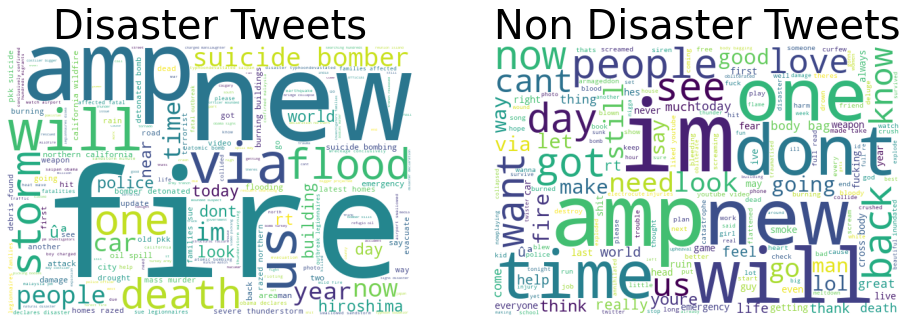

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[16, 8])

wordcloud1 = WordCloud(background_color='white', width=600, height=400).generate(" ".join(disaster_tweets))

ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Disaster Tweets',fontsize=40);

wordcloud2 = WordCloud(background_color='white',width=600, height=400).generate(" ".join(non_disaster_tweets))

ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Non Disaster Tweets',fontsize=40);

In [20]:
# NLP library
import nltk
from nltk.corpus import stopwords

Tokenization is a way of separating a piece of text into smaller units called tokens.

In [21]:
#Tokenizer
token=nltk.tokenize.RegexpTokenizer(r'\w+')

#applying token
train.text=train.text.apply(lambda x:token.tokenize(x))
test.text=test.text.apply(lambda x:token.tokenize(x))

display(train.text.head())

0    [our, deeds, are, the, reason, of, this, earth...
1        [forest, fire, near, la, ronge, sask, canada]
2    [all, residents, asked, to, shelter, in, place...
3    [people, receive, wildfires, evacuation, order...
4    [just, got, sent, this, photo, from, ruby, ala...
Name: text, dtype: object

Stop words are a set of commonly used words in a language.

In [22]:
#Stop Words
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [23]:
#removing stop words
train.text=train.text.apply(lambda x:[w for w in x if w not in stopwords.words('english')])
test.text=test.text.apply(lambda x:[w for w in x if w not in stopwords.words('english')])

Stemming is a technique used to extract the base form of the words by removing affixes from them.

In [24]:
train.text.head()

0    [deeds, reason, earthquake, may, allah, forgiv...
1        [forest, fire, near, la, ronge, sask, canada]
2    [residents, asked, shelter, place, notified, o...
3    [people, receive, wildfires, evacuation, order...
4    [got, sent, photo, ruby, alaska, smoke, wildfi...
Name: text, dtype: object

In [25]:
test.text.head()

0                     [happened, terrible, car, crash]
1    [heard, earthquake, different, cities, stay, s...
2    [forest, fire, spot, pond, geese, fleeing, acr...
3           [apocalypse, lighting, spokane, wildfires]
4            [typhoon, soudelor, kills, china, taiwan]
Name: text, dtype: object

In [26]:
#stemmering the text and joining
stemmer = nltk.stem.PorterStemmer()
train.text=train.text.apply(lambda x:" ".join(stemmer.stem(token) for token in x))
test.text=test.text.apply(lambda x:" ".join(stemmer.stem(token) for token in x))

train.text.head()

0            deed reason earthquak may allah forgiv us
1                 forest fire near la rong sask canada
2    resid ask shelter place notifi offic evacu she...
3          peopl receiv wildfir evacu order california
4    got sent photo rubi alaska smoke wildfir pour ...
Name: text, dtype: object

In [27]:
# ML Library
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, TfidfTransformer
from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
import pickle         #Python pickle module is used for serializing and de-serializing a Python object structure. 

Text Vectorization is the process of converting text into numerical representation. 

In [28]:
#Text Vectorization
count_vectorizer = CountVectorizer()
train_vectors_count = count_vectorizer.fit_transform(train['text'])
test_vectors_count = count_vectorizer.transform(test["text"])

In natural language processing, logistic regression is the base- line supervised machine learning algorithm for classification

In [29]:
#Logistic Regression on Counts
CLR = LogisticRegression(C=2)
scores = cross_val_score(CLR, train_vectors_count, train["target"], cv=6, scoring="f1")
scores

array([0.64069264, 0.53245532, 0.59334566, 0.49111808, 0.59638554,
       0.7183908 ])

Logistic Regression worked poor in F1 score

Naive Bayes used to predict the probability of different class based on various attributes.

In [30]:
#Naive Bayes
NB_Vec = MultinomialNB()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(NB_Vec, train_vectors_count, train["target"], cv=cv, scoring="f1")
scores

array([0.77127244, 0.75604053, 0.74760383, 0.74822415, 0.76228209,
       0.75396825, 0.75545171, 0.75917065, 0.75851148, 0.75409836,
       0.74584323, 0.74451411, 0.76682316, 0.75911252, 0.75862069])

In [31]:
#Fitting model and predicting the test data
NB_Vec.fit(train_vectors_count, train["target"])

MultinomialNB()

A machine learning pipeline is a way to codify and automate the workflow it takes to produce a machine learning model.

In [32]:
#Saving model pipeline and model
pipe = Pipeline([('Vectors', CountVectorizer(stop_words='english')),('tfidf', TfidfTransformer()), ('NB', MultinomialNB())])
pipe.fit(train.text.values, train["target"].values)

Pipeline(steps=[('Vectors', CountVectorizer(stop_words='english')),
                ('tfidf', TfidfTransformer()), ('NB', MultinomialNB())])

In [33]:
#Save pipeline
with open('pipeline_model.pkl', 'wb') as model_file:
  pickle.dump(pipe, model_file)

In [34]:
#Save model
with open('nb_class_model.pkl', 'wb') as model_file:
  pickle.dump(NB_Vec, model_file)

In [35]:
pred=NB_Vec.predict(test_vectors_count)

In [36]:
#Testing pipeline
def testing(tweet):
  predicted = pipe.predict([Tweet])[0]

  if predicted == 1:
    print("The tweet is Disaster Tweet")
  else:
    print("The tweet is Non Disaster Tweet")

In [37]:
Tweet="Birmingham Wholesale Market is ablaze BBC News - Fire breaks out at Birmingham's Wholesale Market http://t.co/irWqCEZWE"
testing(Tweet)

The tweet is Disaster Tweet


In [38]:
Tweet="The cold across the center of the country early in"
testing(Tweet)

The tweet is Non Disaster Tweet


In [39]:
Tweet="NOOOOOOOOO! Don't do that!"
testing(Tweet)

The tweet is Non Disaster Tweet


In [40]:
Tweet="thousands of wildfires ablaze in California alone"
testing(Tweet)

The tweet is Disaster Tweet
